In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dataset_buys _comp.csv")
print(df.head())
print(df.info())

          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None


📊 2. Eksplorasi Data dan Visualisasi
Melihat statistik ringkasan:

In [2]:
print(df.describe())


       Buys_Computer
count    1000.000000
mean        0.669000
std         0.470809
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000


Visualisasi sebaran fitur terhadap kelas:

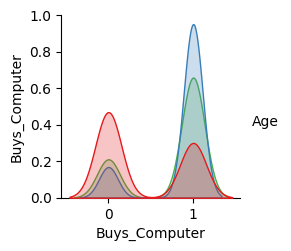

In [3]:
sns.pairplot(df, hue='Age', palette='Set1')
plt.show()


🧪 3. Pembagian Data (Training dan Testing)
Pisahkan fitur dan label:

In [4]:
X = df.drop('Age', axis=1)
y = df['Age']


Bagi menjadi data latih dan data uji (70:30):

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train))  # Jumlah data latih


700


🌲 4. Membangun Model Decision Tree
Gunakan metode DecisionTreeClassifier:

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

model.fit(X_train, y_train)


NameError: name 'model' is not defined

📈 5. Evaluasi Model
📄 Classification Report:

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

        Muda       0.52      0.50      0.51       102
  Paruh Baya       0.54      0.67      0.60       104
         Tua       0.68      0.53      0.60        94

    accuracy                           0.57       300
   macro avg       0.58      0.57      0.57       300
weighted avg       0.58      0.57      0.57       300



🔲 Confusion Matrix (Visualisasi):

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        71
           1       0.81      0.88      0.84       129

    accuracy                           0.79       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.79      0.79      0.79       200



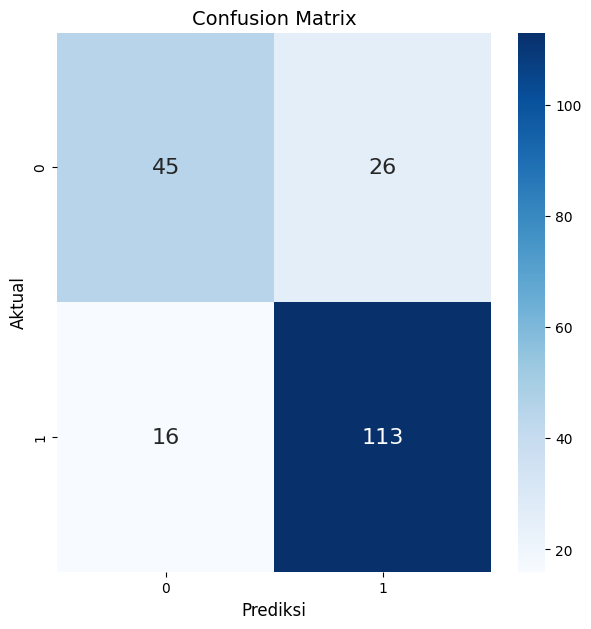

['Age', 'Income', 'Student', 'Credit_Rating', 'Buys_Computer']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("dataset_buys _comp.csv")
# 2. Encode fitur kategorikal
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# 3. Pisahkan fitur dan label
X = df.drop('Buys_Computer', axis=1)  # Kolom target
y = df['Buys_Computer']

# 4. Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Buat dan latih model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)

# 6. Prediksi
y_pred = model.predict(X_test)

# 7. Evaluasi dengan classification report
print(classification_report(y_test, y_pred))

# 8. Confusion matrix dan visualisasinya
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Aktual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

print(df.columns.tolist())


In [ ]:
print(df.columns.tolist())


['Age', 'Income', 'Student', 'Credit_Rating', 'Buys_Computer']


🌳 6. Visualisasi Decision Tree
Visualisasi struktur pohon:

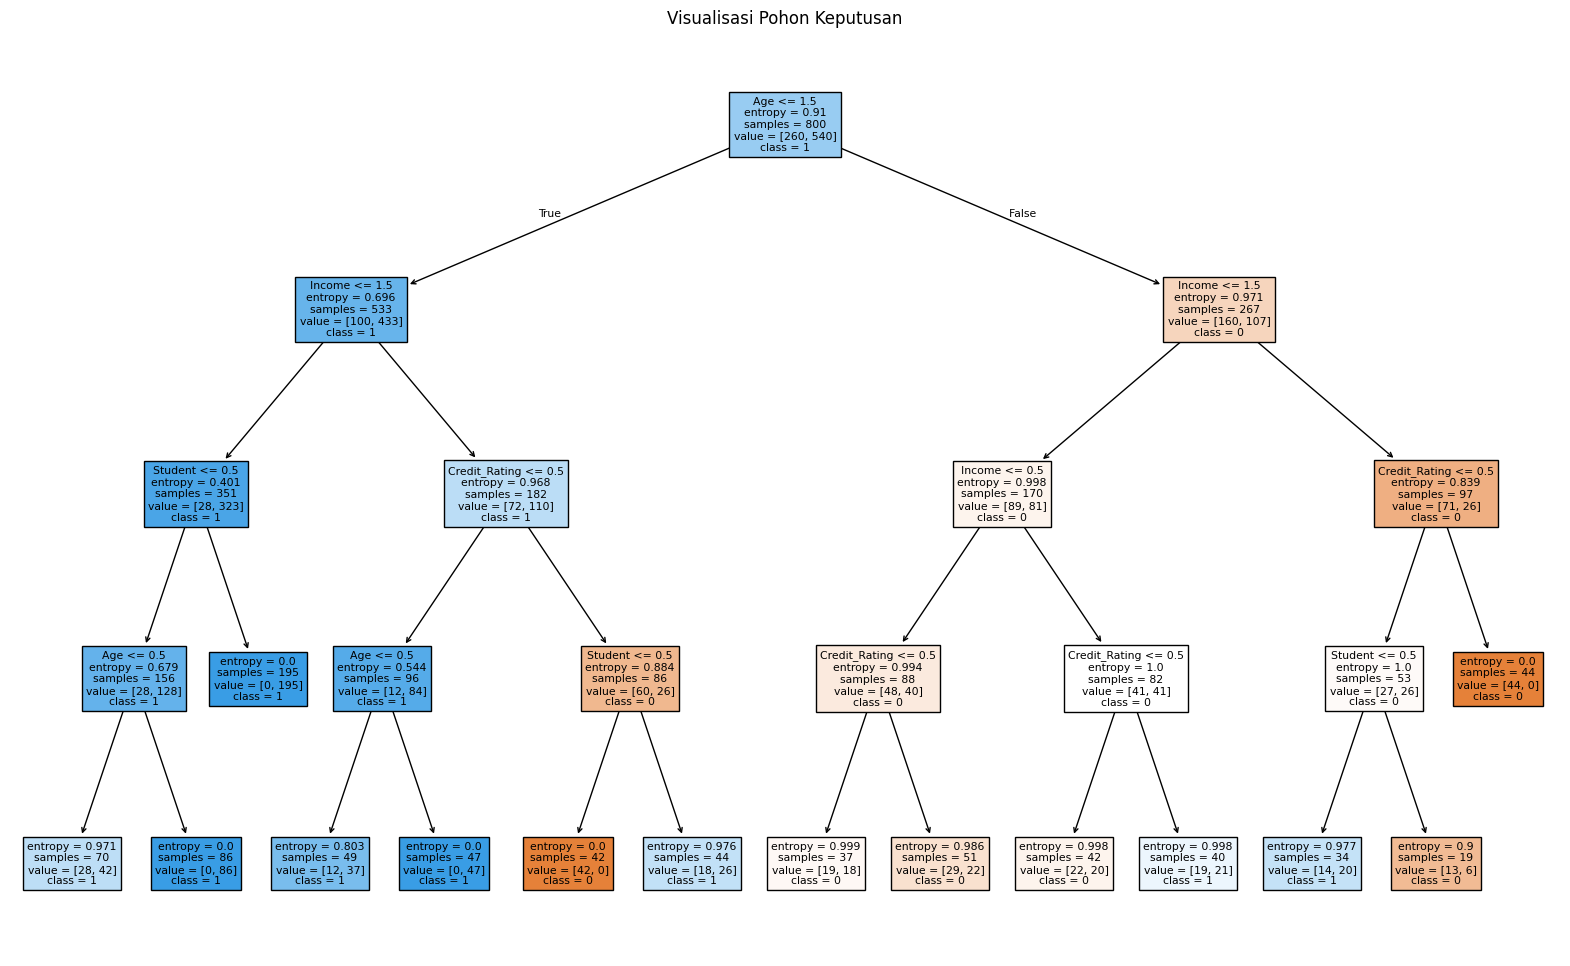

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 12))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_.astype(str), filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()

